# Airbnb Superhost Business Case at Amsterdam

**Data Source**: https://recruitingupload.blob.core.windows.net/senioranalyst202006/listings.csv

**Purpose**: Analysis and dasboard design for the above project

**Procedure**: <br>
1- Making a pipeline to automatically extract data from the database(E)<br> 
2- Profiling, Cleansing, Exploratory Analysis(T)<br> 
3- Defining relevant KPIs (see below)<br> 
4- Saving Jupyter datasets in PowerBi import data folder<br> 
5- Modelling and visualizing, and adding weekly data automatically from the folder database<br> 
6- Maintaining the dashboard and continiously add value to it

**Vacation Rental KPIs/Diagrams Described:**

*Listings Overview*:<br>
Total Listings by Host (Total number of listings by superhosts vs non Superhosts)<br>
Yearly Average Host Availability Days (Average number of days superhost vs non superhost availablilty)<br>
Total Available Listings by Host (Sum of listings in a given time - data modeling needed)<br>
Active Rental by Host (Total Entire, share, private by Host)<br>
Rental Size By Host (Sum of rooms)<br>
Instant Bookable By Host (Average/Sum of instant bookable)<br>

*Host Overview*:<br>
Average Reviews by Host (Average of reviews)<br>
Average Rating By Host (Average Score rate of hosts by different criteria by host)<br>
5-Star Rate By Host (Count Score 10 in all criteria /total)<br>
Response Time By Host (Count Airbnb catagories)<br>
Response Rate By Host (Average of response rate)<br>
Host Transparency Rate By Host (Count identity verified by Host)<br>
(KPI)Committment Rate By Host (See KPI 1)<br>

*Rates & Occupancy*:<br>
Average Daily Rate (ADR) by Host (Average of Price in a timeseries, data modeling needed)<br>
ADR BY Room Type (Average ADR by Host and Room Type)<br>
(KPI)Average of Minimum Spending Per Stay By Host (See KPI 2)<br>
(KPI)Minimum Occupancy Rate in 2018-2019 By Host (See KPI 3)<br>
Total Capacity of Host to Accommodate Guests (Sum of accommodates)<br>
Average of Minimum Nights By Host (Average minimum_nights)<br>

*Performance*:<br>
(KPI)Host Daily Revenue Per Available Room (RevPar) in 2018-2019 (See KPI 4)<br>
(KPI)Airbnb Daily RevPar in 2018-2019 (See KPI 5)<br>
(KPI)Airbnb Gross Revenue 2018-2019 (Actual) (See KPI 6)<br>
(KPI)Airbnb Gross Revenue 2018-2019 (Goal) (See KPI 7)<br>
Customer Lifespan By Host (review_duration)<br>
(KPI)Lifetime Value (See KPI 8)<br>

# 1. Loading Libraries and Data

In [1]:
import pandas as pd													# data manipulation
import matplotlib.pyplot as plt												# graphs
import seaborn as sns													# graphs
import numpy as np													# graphs
from scipy.stats import norm												# statistics
from sklearn.preprocessing import StandardScaler									# statistics
from scipy import stats													# statistics
from math import *													# advance calculation	
from matplotlib import cm												# graphs
from matplotlib.pyplot import figure											# graphs
import sys														# system functions
import warnings														# indicating warnings
warnings.filterwarnings('ignore')											# ignore by default
from matplotlib.ticker import LinearLocator										# graphs
pd.set_option('display.max_columns', None)										# show all columns
pd.set_option('display.max_rows', None)											# show all rows
np.set_printoptions(threshold=sys.maxsize)										# show arrays full
pd.set_option("display.max_colwidth", 40)										# show a complete text in a cell
pd.set_option('display.precision',5)											# precision decimals pd
np.set_printoptions(precision=3)											# precision decimals np
from xlsxwriter.workbook import Workbook										# CSV writing
import csv														# CSV writing	
import xgboost as xgb													# prediction
import pickle														# prediction	
import sklearn														# mutual information
import statsmodels.api as sm												# coefficient
from sklearn.ensemble import RandomForestClassifier									# random forest
from sklearn import linear_model											# linear regression
import pymysql														# MySql connection
import psycopg2														# PostgreSQL database adapter
import datetime														# time conversions
import random														# randomchoice
import math as math													# maths
import statistics													# statistics
import glob														# paths and files management
import matplotlib.image as mpimg											# matplot image
from functools import reduce												# reduce
import folium														# interactive map
from folium.plugins import FastMarkerCluster										# interactive map

In [2]:
# Pulling the data

df = pd.read_csv('https://recruitingupload.blob.core.windows.net/senioranalyst202006/listings.csv')

# 2.1 Data Profiling

In [12]:
df.sample(5)

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,longitude,latitude,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,days_since_calendar_updated,amenity_wifi,amenity_kitchen,amenity_tv
9598,14166378,22072623,2014-10-03,NaN,NaN,False,1.0,1.0,True,True,4.87132,52.38082,Westerpark,False,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,NaN,95,NaN,25.0,1,0,2,7,0,0,0,0,7,2016-08-22,2017-05-21,94.0,10.0,9.0,10.0,10.0,8.0,9.0,False,strict_14_with_grace_period,450,False,False,False
18701,25566684,192850129,2018-06-01,within an hour,1.0,False,1.0,1.0,True,False,4.89633,52.35582,De Pijp - Rivierenbuurt,True,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,NaN,105,300.0,35.0,1,0,3,3,4,4,4,4,5,2018-07-19,2018-08-06,92.0,10.0,10.0,10.0,10.0,10.0,8.0,True,moderate,0,False,False,False
12310,17941249,27576297,2015-02-11,within an hour,1.0,False,1.0,1.0,True,True,4.87083,52.36281,De Baarsjes - Oud-West,False,Townhouse,Entire home/apt,2,1.0,0.0,1.0,Real Bed,NaN,159,0.0,25.0,1,0,1,90,30,53,83,358,24,2017-04-09,2018-06-23,93.0,9.0,10.0,10.0,10.0,10.0,9.0,True,strict_14_with_grace_period,35,False,False,False
1070,1358042,7371529,2013-07-09,within an hour,1.0,True,1.0,1.0,True,False,4.96689,52.38281,Noord-Oost,True,Boat,Private room,2,1.0,1.0,1.0,Real Bed,NaN,75,NaN,NaN,1,0,2,90,2,7,12,276,319,2013-08-23,2018-08-05,98.0,10.0,10.0,10.0,10.0,9.0,10.0,True,strict_14_with_grace_period,2,False,False,False
585,797660,4200665,2012-11-20,within an hour,1.0,False,1.0,1.0,True,True,4.90282,52.35412,De Pijp - Rivierenbuurt,True,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,165,200.0,50.0,2,0,2,30,0,0,0,8,91,2013-01-15,2018-07-06,90.0,9.0,9.0,10.0,10.0,9.0,9.0,False,strict_14_with_grace_period,0,False,False,False


In [13]:
df.shape

(20112, 49)

In [14]:
df.describe()

,id,host_id,host_response_rate,host_listings_count,host_total_listings_count,longitude,latitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,days_since_calendar_updated
count,2.01120e+04,2.01120e+04,13090.00000,20107.00000,20107.00000,20112.00000,20112.00000,20112.00000,20103.00000,20105.00000,20106.00000,423.00000,20112.00000,13801.00000,16489.00000,20112.00000,20112.00000,20112.00000,20112.00000,20112.00000,20112.00000,20112.00000,20112.00000,20112.00000,17400.00000,17384.00000,17388.00000,17370.00000,17384.00000,17371.00000,17370.00000,20112.00000
mean,1.43355e+07,4.58340e+07,0.94870,6.18924,6.18924,4.88920,52.36524,2.88738,1.12951,1.44934,1.85731,514.11348,145.49025,218.93225,38.91600,1.46559,11.21415,3.03520,62.46152,4.19685,8.13644,13.19575,60.03565,20.27228,94.59500,9.65255,9.44180,9.70553,9.74919,9.38737,9.16695,132.38455
std,7.79423e+06,5.13072e+07,0.15225,25.15321,25.15321,0.03577,0.01595,1.31025,0.36520,0.89536,1.38320,531.65537,101.75307,307.37870,23.01679,0.92195,22.02981,4.00526,35.45833,7.48535,14.50957,22.99137,101.04684,40.44361,6.92182,0.71768,0.89688,0.69728,0.66141,0.75114,0.82521,228.55171
min,2.81800e+03,3.15900e+03,0.00000,0.00000,0.00000,4.75679,52.28927,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,20.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,0.00000
25%,7.70468e+06,7.94594e+06,1.00000,1.00000,1.00000,4.86368,52.35512,2.00000,1.00000,1.00000,1.00000,0.00000,95.00000,95.00000,25.00000,1.00000,0.00000,2.00000,21.00000,0.00000,0.00000,0.00000,0.00000,2.00000,93.00000,9.00000,9.00000,10.00000,10.00000,9.00000,9.00000,4.00000
50%,1.47427e+07,2.31228e+07,1.00000,1.00000,1.00000,4.88637,52.36458,2.00000,1.00000,1.00000,1.00000,452.00000,125.00000,150.00000,36.00000,1.00000,0.00000,2.00000,90.00000,0.00000,0.00000,0.00000,4.00000,8.00000,96.00000,10.00000,10.00000,10.00000,10.00000,10.00000,9.00000,28.00000
75%,2.07359e+07,6.70785e+07,1.00000,1.00000,1.00000,4.90861,52.37501,4.00000,1.00000,2.00000,2.00000,807.00000,170.00000,251.00000,50.00000,2.00000,20.00000,3.00000,90.00000,5.00000,10.00000,15.00000,72.00000,21.00000,100.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,150.00000
max,2.75655e+07,2.07978e+08,1.00000,629.00000,629.00000,5.02769,52.42888,17.00000,15.00000,12.00000,32.00000,3229.00000,4500.00000,4736.00000,531.00000,16.00000,280.00000,60.00000,90.00000,30.00000,60.00000,90.00000,365.00000,655.00000,100.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,2214.00000


In [3]:
# Show null values and duplicates

def nulldup(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100, 3)
    missing_data = pd.concat([total, percent], axis=1, keys=['NullTotal', 'Null%'])
    for dup in missing_data.index:
        missing_data.at[dup,'DupTotal'] = df.duplicated(subset=[dup]).sum()
        missing_data.at[dup,'Dup%'] = round((df.duplicated(subset=[dup]).sum())/df.shape[0]*100,3)
    return missing_data
missing_data = nulldup(df)
missing_data

,NullTotal,Null%,DupTotal,Dup%
square_feet,19689,97.897,20033.0,99.607
host_response_time,7022,34.914,20107.0,99.975
host_response_rate,7022,34.914,20045.0,99.667
security_deposit,6311,31.379,19960.0,99.244
cleaning_fee,3623,18.014,20012.0,99.503
review_scores_value,2742,13.634,20102.0,99.950
review_scores_checkin,2742,13.634,20102.0,99.950
review_scores_location,2741,13.629,20103.0,99.955
review_scores_communication,2728,13.564,20102.0,99.950
review_scores_accuracy,2728,13.564,20102.0,99.950


In [16]:
# Count Values

def count(df):
    pd.set_option('display.max_rows', 100)
    for column in df.columns:
        print(column,':')
        display(df[column].value_counts(dropna=False))
        print('___________________________________','\n')
count(df)

id :


19075070    1
11917918    1
19042016    1
25051482    1
17230424    1
           ..
877814      1
18115831    1
18748664    1
6524155     1
26314753    1
Name: id, Length: 20112, dtype: int64

___________________________________ 

host_id :


65859990     162
113977564    127
107745142    100
84453740     84 
1464510      77 
             .. 
2868130      1  
1616799      1  
16563101     1  
57619356     1  
42405890     1  
Name: host_id, Length: 17226, dtype: int64

___________________________________ 

host_since :


2016-04-05    168
2016-07-18    145
2017-01-30    133
2016-12-19    103
2011-12-02    79 
              .. 
2011-08-27    1  
2011-11-16    1  
2011-07-21    1  
2017-01-22    1  
2011-09-18    1  
Name: host_since, Length: 2737, dtype: int64

___________________________________ 

host_response_time :


NaN                   7022
within an hour        6848
within a few hours    3184
within a day          2751
a few days or more    307 
Name: host_response_time, dtype: int64

___________________________________ 

host_response_rate :


1.00    10315
NaN     7022 
0.90    436  
0.80    285  
0.97    186  
0.00    155  
0.50    144  
0.98    131  
0.67    122  
0.99    105  
0.75    95   
0.70    88   
0.83    84   
0.86    79   
0.89    77   
0.88    72   
0.60    69   
0.96    60   
0.95    56   
0.93    52   
0.92    43   
0.40    42   
0.94    36   
0.33    26   
0.91    24   
0.87    24   
0.78    23   
0.71    21   
0.57    20   
0.82    19   
0.85    19   
0.77    19   
0.79    17   
0.25    16   
0.20    15   
0.38    13   
0.73    10   
0.81    9    
0.63    9    
0.84    8    
0.44    6    
0.30    5    
0.56    5    
0.61    4    
0.19    4    
0.17    3    
0.76    3    
0.36    3    
0.43    3    
0.69    3    
0.68    3    
0.46    3    
0.10    2    
0.14    2    
0.62    2    
0.29    2    
0.66    2    
0.31    2    
0.74    1    
0.22    1    
0.64    1    
0.21    1    
0.55    1    
0.65    1    
0.47    1    
0.58    1    
0.13    1    
Name: host_response_rate, dtype: int64

___________________________________ 

host_is_superhost :


False    16995
True     3112 
NaN      5    
Name: host_is_superhost, dtype: int64

___________________________________ 

host_listings_count :


1.0      15187
2.0      2466 
3.0      674  
4.0      236  
181.0    162  
135.0    127  
5.0      124  
6.0      103  
103.0    100  
85.0     84   
8.0      83   
79.0     77   
9.0      48   
163.0    43   
45.0     42   
7.0      41   
44.0     41   
114.0    38   
26.0     31   
13.0     30   
33.0     30   
30.0     30   
24.0     27   
11.0     26   
21.0     25   
22.0     24   
12.0     23   
0.0      22   
15.0     21   
54.0     21   
10.0     19   
17.0     19   
18.0     18   
78.0     17   
34.0     12   
102.0    9    
NaN      5    
14.0     5    
27.0     5    
629.0    3    
82.0     3    
16.0     2    
48.0     2    
125.0    2    
25.0     2    
313.0    2    
37.0     1    
Name: host_listings_count, dtype: int64

___________________________________ 

host_total_listings_count :


1.0      15187
2.0      2466 
3.0      674  
4.0      236  
181.0    162  
135.0    127  
5.0      124  
6.0      103  
103.0    100  
85.0     84   
8.0      83   
79.0     77   
9.0      48   
163.0    43   
45.0     42   
7.0      41   
44.0     41   
114.0    38   
26.0     31   
13.0     30   
33.0     30   
30.0     30   
24.0     27   
11.0     26   
21.0     25   
22.0     24   
12.0     23   
0.0      22   
15.0     21   
54.0     21   
10.0     19   
17.0     19   
18.0     18   
78.0     17   
34.0     12   
102.0    9    
NaN      5    
14.0     5    
27.0     5    
629.0    3    
82.0     3    
16.0     2    
48.0     2    
125.0    2    
25.0     2    
313.0    2    
37.0     1    
Name: host_total_listings_count, dtype: int64

___________________________________ 

host_has_profile_pic :


True     20080
False    27   
NaN      5    
Name: host_has_profile_pic, dtype: int64

___________________________________ 

host_identity_verified :


False    11425
True     8682 
NaN      5    
Name: host_identity_verified, dtype: int64

___________________________________ 

longitude :


4.94211    1
4.87757    1
4.89320    1
4.87237    1
4.87222    1
          ..
4.83122    1
4.87765    1
4.91418    1
4.94249    1
4.90032    1
Name: longitude, Length: 20112, dtype: int64

___________________________________ 

latitude :


52.37175    1
52.39028    1
52.39331    1
52.39295    1
52.36567    1
           ..
52.34226    1
52.32790    1
52.36992    1
52.37254    1
52.37087    1
Name: latitude, Length: 20112, dtype: int64

___________________________________ 

neighbourhood_cleansed :


De Baarsjes - Oud-West                    3526
De Pijp - Rivierenbuurt                   2504
Centrum-West                              2319
Centrum-Oost                              1720
Westerpark                                1505
Zuid                                      1465
Oud-Oost                                  1276
Bos en Lommer                             1133
Oostelijk Havengebied - Indische Buurt    974 
Watergraafsmeer                           574 
Oud-Noord                                 573 
IJburg - Zeeburgereiland                  481 
Slotervaart                               391 
Noord-West                                321 
Noord-Oost                                263 
Buitenveldert - Zuidas                    253 
Geuzenveld - Slotermeer                   220 
Osdorp                                    154 
De Aker - Nieuw Sloten                    140 
Gaasperdam - Driemond                     115 
Bijlmer-Centrum                           108 
Bijlmer-Oost 

___________________________________ 

is_location_exact :


True     14069
False    6043 
Name: is_location_exact, dtype: int64

___________________________________ 

property_type :


Apartment                 15756
House                     1603 
Townhouse                 655  
Bed and breakfast         406  
Boat                      406  
Loft                      372  
Condominium               303  
Houseboat                 188  
Guest suite               145  
Other                     58   
Serviced apartment        41   
Guesthouse                34   
Villa                     31   
Boutique hotel            26   
Bungalow                  16   
Cabin                     16   
Cottage                   14   
Hostel                    9    
Tiny house                5    
Hotel                     5    
Chalet                    5    
Camper/RV                 4    
Barn                      4    
Tent                      2    
Casa particular (Cuba)    1    
Yurt                      1    
Campsite                  1    
Windmill                  1    
Castle                    1    
Earth house               1    
Aparthotel                1    
Lighthou

___________________________________ 

room_type :


Entire home/apt    16030
Private room       4018 
Shared room        64   
Name: room_type, dtype: int64

___________________________________ 

accommodates :


2     10914
4     6102 
3     1643 
1     428  
6     418  
5     398  
8     82   
7     54   
16    27   
12    14   
10    14   
9     8    
14    6    
11    3    
17    1    
Name: accommodates, dtype: int64

___________________________________ 

bathrooms :


1.0     16454
1.5     2301 
2.0     942  
2.5     190  
0.5     81   
3.0     69   
0.0     24   
3.5     19   
4.0     13   
NaN     9    
8.0     5    
4.5     2    
15.0    1    
5.0     1    
7.0     1    
Name: bathrooms, dtype: int64

___________________________________ 

bedrooms :


1.0     11880
2.0     4776 
3.0     1687 
0.0     1154 
4.0     495  
5.0     76   
6.0     17   
NaN     7    
10.0    6    
8.0     5    
7.0     4    
12.0    3    
11.0    1    
9.0     1    
Name: bedrooms, dtype: int64

___________________________________ 

beds :


1.0     10867
2.0     5220 
3.0     1850 
4.0     1387 
5.0     361  
6.0     271  
7.0     46   
8.0     46   
16.0    14   
12.0    12   
10.0    12   
NaN     6    
18.0    4    
9.0     4    
32.0    3    
14.0    3    
0.0     1    
11.0    1    
17.0    1    
22.0    1    
20.0    1    
13.0    1    
Name: beds, dtype: int64

___________________________________ 

bed_type :


Real Bed         19901
Pull-out Sofa    146  
Futon            43   
Airbed           16   
Couch            6    
Name: bed_type, dtype: int64

___________________________________ 

square_feet :


NaN       19689
0.0       134  
753.0     22   
646.0     18   
700.0     18   
592.0     15   
1076.0    13   
969.0     13   
538.0     12   
861.0     10   
915.0     10   
1615.0    9    
807.0     8    
484.0     7    
377.0     7    
431.0     6    
323.0     6    
269.0     6    
1345.0    5    
1023.0    5    
161.0     4    
129.0     4    
624.0     4    
1184.0    4    
60.0      3    
409.0     3    
1938.0    3    
1722.0    3    
258.0     3    
1399.0    3    
215.0     3    
108.0     2    
2153.0    2    
1292.0    2    
904.0     2    
344.0     2    
70.0      2    
32.0      2    
183.0     2    
1238.0    2    
1130.0    2    
86.0      2    
301.0     2    
1507.0    2    
280.0     2    
110.0     1    
430.0     1    
1227.0    1    
475.0     1    
50.0      1    
560.0     1    
968.0     1    
2691.0    1    
1453.0    1    
234.0     1    
1830.0    1    
8.0       1    
366.0     1    
2422.0    1    
1012.0    1    
226.0     1    
248.0     1    
527.0   

___________________________________ 

price :


150     1187
100     1112
120     925 
125     669 
200     608 
       ...  
1254    1   
1190    1   
790     1   
726     1   
8       1   
Name: price, Length: 421, dtype: int64

___________________________________ 

security_deposit :


NaN      6311
0.0      3241
100.0    2267
250.0    1699
150.0    1388
         ... 
425.0    1   
289.0    1   
220.0    1   
106.0    1   
398.0    1   
Name: security_deposit, Length: 152, dtype: int64

___________________________________ 

cleaning_fee :


NaN      3623
50.0     2224
30.0     1800
40.0     1628
25.0     1550
35.0     1499
45.0     1262
20.0     1116
0.0      771 
60.0     683 
15.0     660 
10.0     407 
75.0     350 
55.0     340 
39.0     223 
80.0     213 
65.0     183 
70.0     180 
100.0    164 
49.0     142 
150.0    85  
5.0      85  
69.0     83  
59.0     83  
29.0     62  
79.0     45  
85.0     36  
12.0     35  
90.0     35  
8.0      32  
19.0     32  
38.0     29  
18.0     29  
95.0     27  
36.0     26  
24.0     22  
125.0    20  
37.0     19  
120.0    19  
89.0     16  
200.0    16  
33.0     15  
27.0     15  
23.0     13  
32.0     12  
48.0     11  
7.0      10  
99.0     10  
22.0     10  
17.0     9   
42.0     8   
28.0     8   
44.0     8   
78.0     8   
26.0     7   
9.0      7   
52.0     6   
14.0     6   
47.0     6   
57.0     5   
34.0     5   
175.0    5   
4.0      5   
72.0     4   
13.0     4   
110.0    4   
199.0    4   
130.0    4   
180.0    3   
11.0     3   
21.0     3   
249.0 

___________________________________ 

guests_included :


1     13655
2     5093 
4     849  
3     324  
5     81   
6     66   
8     16   
12    7    
10    7    
16    7    
7     4    
15    2    
14    1    
Name: guests_included, dtype: int64

___________________________________ 

extra_people :


0      13180
25     1154 
30     873  
20     791  
50     764  
      ...   
53     1    
254    1    
132    1    
36     1    
255    1    
Name: extra_people, Length: 105, dtype: int64

___________________________________ 

minimum_nights :


2     8471
3     4909
1     2964
4     1557
5     999 
7     490 
6     261 
14    83  
10    82  
60    50  
30    48  
8     31  
21    27  
20    27  
12    17  
9     17  
15    14  
13    12  
28    7   
29    6   
50    6   
18    5   
45    5   
25    5   
31    3   
40    3   
11    3   
59    2   
24    2   
52    1   
22    1   
19    1   
27    1   
33    1   
17    1   
Name: minimum_nights, dtype: int64

___________________________________ 

maximum_nights :


90    12152
30    1110 
14    974  
7     833  
60    623  
10    522  
21    479  
20    335  
5     298  
15    289  
4     262  
31    224  
3     218  
6     202  
8     188  
28    146  
12    124  
2     103  
25    100  
9     98   
13    72   
40    70   
18    63   
16    60   
50    56   
11    47   
35    45   
17    42   
22    40   
19    36   
24    31   
29    28   
1     28   
32    25   
23    21   
45    20   
26    13   
27    13   
33    11   
80    11   
34    10   
59    9    
42    7    
65    6    
56    6    
62    5    
61    5    
58    5    
36    4    
38    4    
70    4    
44    4    
55    3    
43    3    
54    2    
51    2    
87    2    
41    2    
75    2    
37    2    
48    2    
64    1    
49    1    
57    1    
66    1    
52    1    
69    1    
85    1    
39    1    
88    1    
89    1    
84    1    
Name: maximum_nights, dtype: int64

___________________________________ 

availability_30 :


0     11870
1     814  
2     679  
3     672  
4     649  
5     565  
6     447  
7     403  
8     359  
9     297  
10    283  
12    271  
29    251  
11    241  
30    239  
13    214  
15    182  
14    169  
17    140  
16    140  
18    137  
23    135  
27    119  
24    118  
28    117  
19    115  
22    110  
20    107  
25    96   
21    93   
26    80   
Name: availability_30, dtype: int64

___________________________________ 

availability_60 :


0     10905
1     687  
3     573  
2     541  
4     484  
5     453  
7     390  
6     383  
8     338  
9     295  
10    289  
12    263  
11    229  
15    211  
13    206  
14    196  
60    168  
18    159  
16    154  
59    151  
17    148  
19    139  
21    127  
20    125  
24    118  
25    115  
27    110  
22    99   
23    97   
26    91   
30    90   
32    81   
53    79   
28    79   
33    74   
35    74   
38    73   
29    70   
36    69   
31    67   
34    66   
58    64   
51    61   
52    60   
42    59   
40    59   
47    57   
54    57   
57    56   
43    56   
45    52   
37    51   
48    51   
39    51   
50    49   
41    48   
56    47   
46    46   
55    43   
44    43   
49    36   
Name: availability_60, dtype: int64

___________________________________ 

availability_90 :


0     10334
1     577  
4     505  
3     482  
2     436  
5     351  
7     343  
6     327  
8     288  
10    257  
9     246  
12    240  
11    228  
13    201  
15    190  
14    172  
16    163  
90    156  
18    140  
89    139  
19    135  
17    127  
24    117  
20    110  
22    107  
21    107  
35    99   
25    98   
23    94   
27    90   
32    84   
31    79   
30    79   
26    75   
36    73   
33    71   
34    71   
38    70   
44    68   
46    68   
28    67   
45    67   
40    66   
83    65   
42    65   
29    65   
88    63   
37    63   
49    62   
39    61   
41    61   
55    59   
43    58   
76    54   
65    54   
51    54   
56    54   
47    53   
53    53   
66    53   
87    52   
84    52   
50    52   
60    51   
75    51   
68    51   
48    51   
81    51   
52    49   
58    46   
54    46   
57    45   
82    45   
73    44   
62    44   
72    44   
70    41   
80    41   
59    40   
78    40   
61    40   
63    39   
86    39   
74  

___________________________________ 

availability_365 :


0      8845
1      417 
4      346 
3      345 
2      342 
      ...  
243    5   
206    5   
253    5   
182    4   
181    4   
Name: availability_365, Length: 366, dtype: int64

___________________________________ 

number_of_reviews :


0      2420
1      1532
2      1283
3      1121
4      978 
      ...  
249    1   
409    1   
505    1   
553    1   
423    1   
Name: number_of_reviews, Length: 334, dtype: int64

___________________________________ 

first_review :


NaN           2444
2016-03-30    86  
2017-04-17    84  
2016-05-08    81  
2018-01-01    79  
              ..  
2014-09-02    1   
2014-05-14    1   
2015-10-09    1   
2013-06-27    1   
2013-04-30    1   
Name: first_review, Length: 1989, dtype: int64

___________________________________ 

last_review :


NaN           2442
2018-08-05    442 
2018-07-22    424 
2018-07-29    410 
2018-07-01    332 
             ...  
2016-11-06    1   
2014-09-28    1   
2014-11-12    1   
2016-03-19    1   
2015-09-18    1   
Name: last_review, Length: 1121, dtype: int64

___________________________________ 

review_scores_rating :


100.0    4692
NaN      2712
98.0     1668
97.0     1404
96.0     1334
95.0     1227
93.0     1153
99.0     864 
90.0     811 
94.0     797 
80.0     561 
92.0     560 
91.0     489 
87.0     349 
89.0     294 
88.0     240 
85.0     159 
86.0     132 
84.0     111 
83.0     93  
60.0     79  
70.0     51  
73.0     45  
82.0     43  
78.0     26  
76.0     25  
40.0     24  
77.0     23  
75.0     21  
67.0     18  
81.0     16  
20.0     12  
65.0     12  
71.0     11  
79.0     11  
74.0     9   
50.0     7   
68.0     6   
72.0     6   
64.0     3   
56.0     3   
69.0     2   
30.0     2   
59.0     1   
55.0     1   
53.0     1   
61.0     1   
52.0     1   
54.0     1   
66.0     1   
Name: review_scores_rating, dtype: int64

___________________________________ 

review_scores_accuracy :


10.0    12748
9.0     3756 
NaN     2728 
8.0     639  
7.0     103  
6.0     81   
4.0     24   
2.0     20   
5.0     11   
3.0     2    
Name: review_scores_accuracy, dtype: int64

___________________________________ 

review_scores_cleanliness :


10.0    10542
9.0     5029 
NaN     2724 
8.0     1271 
7.0     278  
6.0     169  
4.0     37   
5.0     30   
2.0     29   
3.0     3    
Name: review_scores_cleanliness, dtype: int64

___________________________________ 

review_scores_checkin :


10.0    13699
9.0     2764 
NaN     2742 
8.0     610  
7.0     158  
6.0     97   
4.0     21   
2.0     12   
5.0     8    
3.0     1    
Name: review_scores_checkin, dtype: int64

___________________________________ 

review_scores_communication :


10.0    14223
NaN     2728 
9.0     2433 
8.0     491  
7.0     126  
6.0     68   
2.0     20   
4.0     16   
5.0     5    
3.0     2    
Name: review_scores_communication, dtype: int64

___________________________________ 

review_scores_location :


10.0    8858
9.0     6830
NaN     2741
8.0     1409
7.0     149 
6.0     105 
4.0     9   
2.0     6   
5.0     5   
Name: review_scores_location, dtype: int64

___________________________________ 

review_scores_value :


9.0     8990
10.0    6069
NaN     2742
8.0     1823
7.0     277 
6.0     141 
4.0     27  
5.0     22  
2.0     20  
3.0     1   
Name: review_scores_value, dtype: int64

___________________________________ 

instant_bookable :


False    15360
True     4752 
Name: instant_bookable, dtype: int64

___________________________________ 

cancellation_policy :


strict_14_with_grace_period    7865
moderate                       7569
flexible                       4641
super_strict_60                34  
super_strict_30                3   
Name: cancellation_policy, dtype: int64

___________________________________ 

days_since_calendar_updated :


0       3316
7       1545
14      1387
21      1073
60      1063
90      899 
28      889 
1       888 
120     798 
35      642 
5       474 
150     473 
210     472 
42      459 
4       424 
180     390 
3       369 
2       340 
240     331 
360     281 
330     278 
300     258 
49      255 
390     243 
270     217 
420     173 
450     162 
480     145 
6       130 
750     129 
510     127 
540     115 
720     114 
600     113 
570     109 
780     105 
630     103 
690     103 
660     97  
960     90  
840     77  
810     60  
930     58  
900     57  
990     46  
870     42  
1110    31  
1080    31  
1140    29  
1020    25  
1050    25  
1170    17  
1200    6   
1320    5   
1380    4   
1350    3   
1290    2   
1559    1   
812     1   
1038    1   
1500    1   
1260    1   
1221    1   
1440    1   
1530    1   
1410    1   
1745    1   
1230    1   
1252    1   
1128    1   
2214    1   
1727    1   
Name: days_since_calendar_updated, dtype: int64

___________________________________ 

amenity_wifi :


False    19580
True     532  
Name: amenity_wifi, dtype: int64

___________________________________ 

amenity_kitchen :


False    20112
Name: amenity_kitchen, dtype: int64

___________________________________ 

amenity_tv :


False    20112
Name: amenity_tv, dtype: int64

___________________________________ 



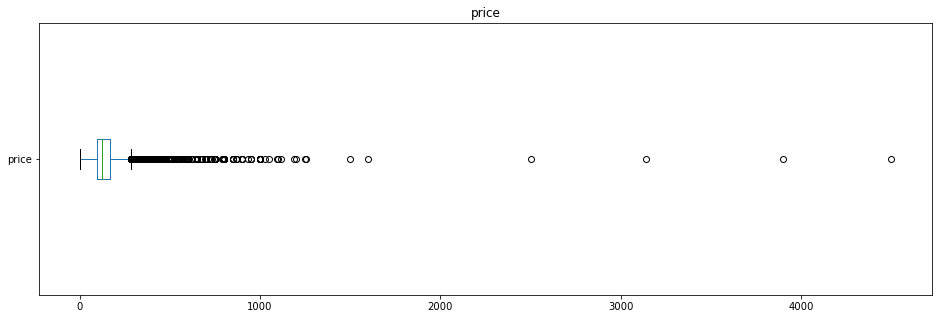

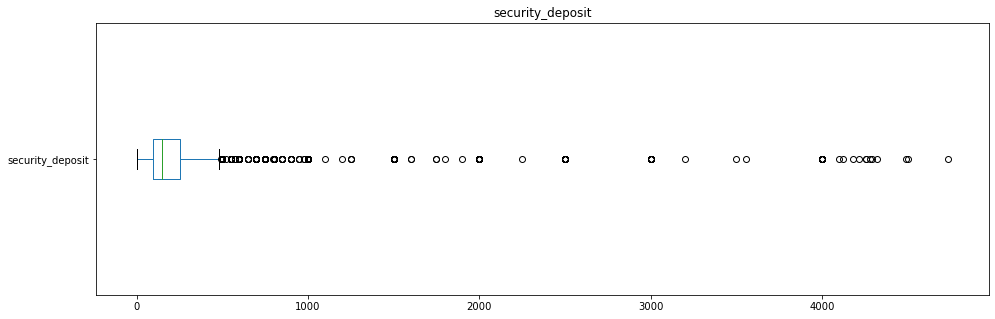

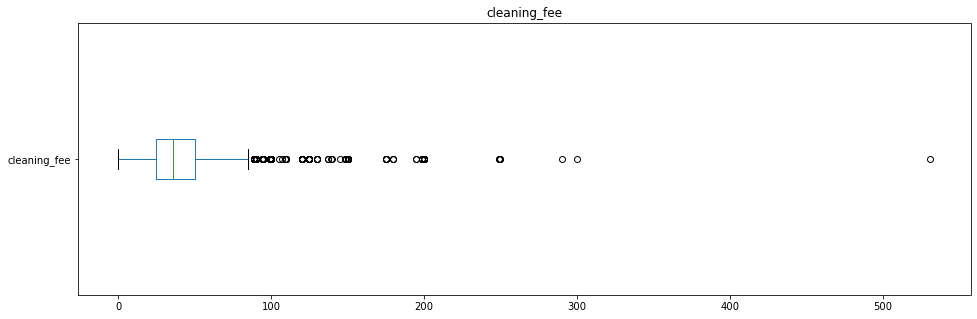

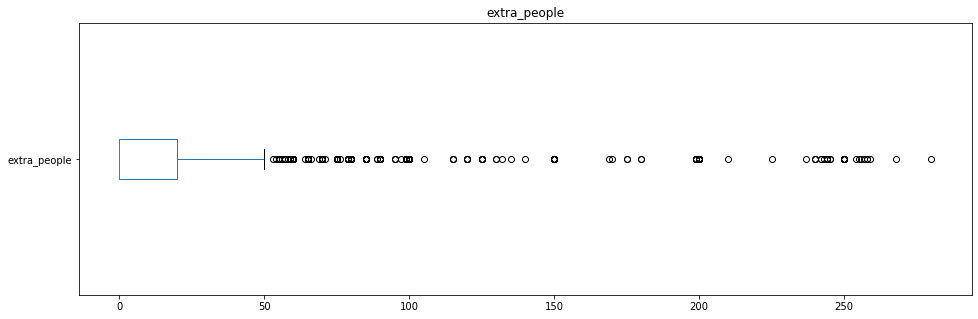

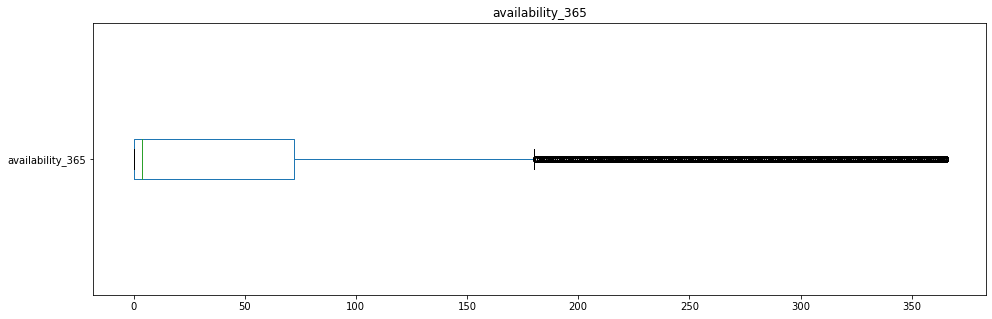

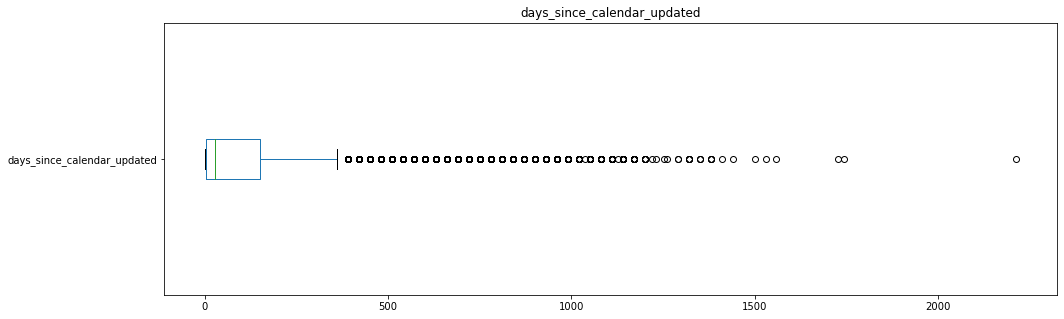

In [17]:
selected = ['price','security_deposit','cleaning_fee','extra_people','availability_365','days_since_calendar_updated']
for feature in selected:
    df[feature].plot(kind='box', vert=False, figsize=(16,5));
    plt.title(feature)
    plt.show()

# 2.2 Data Cleansing

In [4]:
# Cleaning the data

# If both listings columns represent the same values, then we should delete one
if df['host_listings_count'].sum() == df['host_total_listings_count'].sum():
    df.drop(columns=['host_listings_count'], inplace=True)
# We should drop null values of host_is_superhost is null
df.drop(df.loc[df['host_is_superhost'].isnull()].index,inplace=True)
# Drop a column with more than a specific threshhold, here 70% for example
df.drop(columns=[missing_data[missing_data['Null%'] > 70].index[0]], inplace=True)
# Converting objects to datatime
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['host_since'] = pd.to_datetime(df['host_since'])
# Replace host response rate of superhosts with null values by mean of superhosts
df.at[df.loc[df['host_response_time'].isnull() & df['host_is_superhost'] == True].index, 'host_response_rate'] = \
round(df.loc[df['host_is_superhost'] == True]['host_response_rate'].mean(),2)
# Replace bathrooms/bedroom/beds nulls by median 
df.at[df.loc[df['bathrooms'].isnull()].index, 'bathrooms'] = df['bathrooms'].median()
df.at[df.loc[df['bedrooms'].isnull()].index, 'bedrooms'] = df['bedrooms'].median()
df.at[df.loc[df['beds'].isnull()].index, 'beds'] = df['beds'].median()
# Sort by host
df = df.sort_values(['host_id', 'id'], ascending=[True, True])
# Cut outliers
df = df[df['host_total_listings_count'] < 60]
df = df[df['bathrooms'] < 20]
df = df[df['beds'] < 200]
df = df[df['minimum_nights'] < 365]
df = df[df['maximum_nights'] < 2000]
df.drop(df.loc[df['cleaning_fee'] > 200].index,inplace=True)
df.drop(df.loc[df['security_deposit'] > 3000].index,inplace=True)
# Drop amenity columns since not revealing any information
df.drop(columns=['amenity_wifi','amenity_kitchen','amenity_tv'],inplace=True)
# Drop price outliers grater than quantile 0.999
df.drop(df.loc[df['price'] > df['price'].quantile(0.999)].index , inplace=True)
df = df.reset_index(drop=True)
# Rename id to listing_id
df.rename(columns={'id':'listing_id'}, inplace=True)


In [5]:
df.shape

(19390, 44)

# 2.3 Exploratory analysis

# 2.3.1 Location

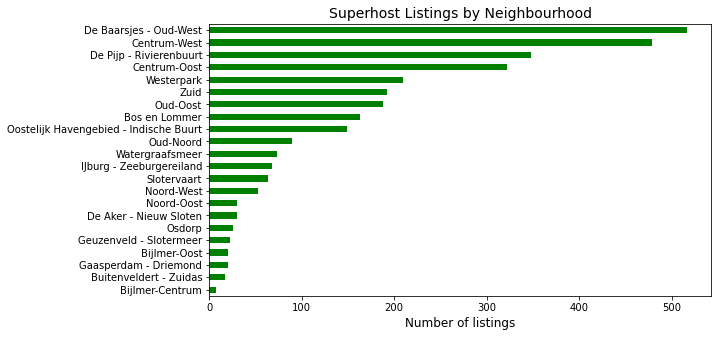

In [74]:
df.loc[df['host_is_superhost'] == True]['neighbourhood_cleansed'].value_counts().sort_values(ascending=True). \
plot.barh(figsize=(9, 5), color='g', width=0.5)
plt.title("Superhost Listings by Neighbourhood", fontsize=14)
plt.xlabel('Number of listings', fontsize=12);

In [78]:
# Superhost Location on the map

dftarget = df.loc[df['host_is_superhost'] == True]
locations = list(zip(dftarget['latitude'].tolist(), dftarget['longitude'].tolist()))
map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

# 2.3.2 Accommodation Type

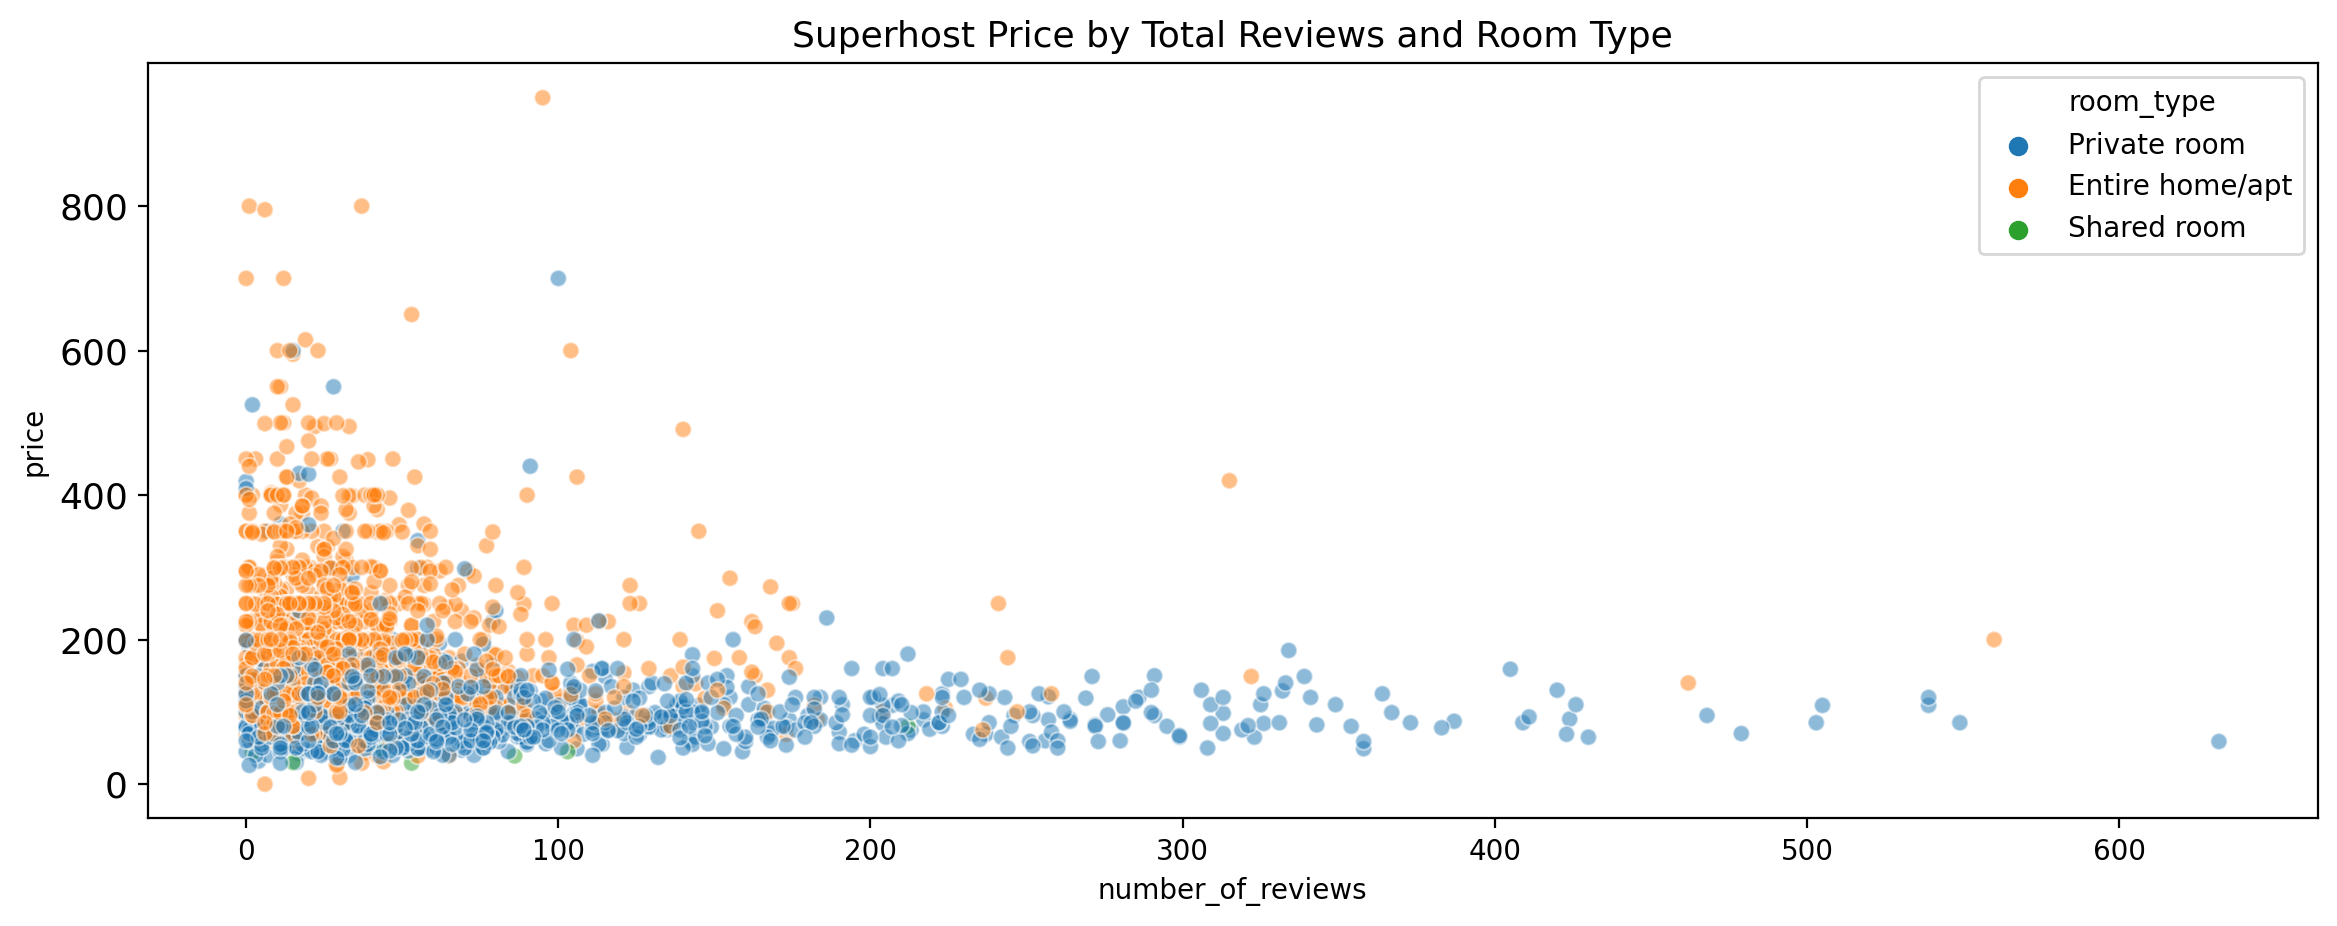

In [129]:
figure(num=None, figsize=(14, 5), dpi=200, facecolor='w', edgecolor='k')
sns.scatterplot(x='number_of_reviews',y='price',data=df.loc[df['host_is_superhost']==True],alpha=0.5, hue='room_type',
                legend="full")
plt.title('Superhost Price by Total Reviews and Room Type', fontsize=13);

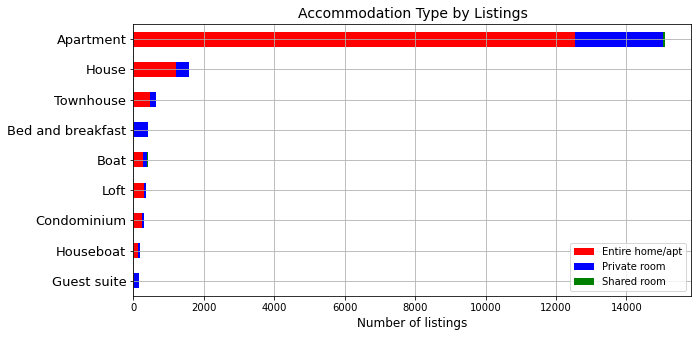

In [130]:
prop = df.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"], grid=True, figsize=(10,5))
plt.title('Accommodation Type by Listings', fontsize=14)
plt.xlabel('Number of listings', fontsize=12)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 10})
plt.rc('ytick', labelsize=13)
plt.show()

# 2.3.3 Listings

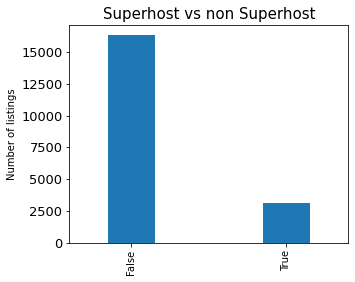

In [135]:
df['host_is_superhost'].value_counts().plot.bar(figsize=(5, 4), width=0.3)
plt.title("Superhost vs non Superhost", fontsize=15)
plt.ylabel('Number of listings', fontsize=10);

In [6]:
# Read an external dataset 

calendar = pd.read_csv('calendar.csv')

In [7]:
# Data exploration and cleansing

# replace ',', stripping $
calendar['price'] = calendar['price'].str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))
# keep the data in a time limit
calendar = calendar[calendar['date'] <= '2019-12-05']
# Sort values
calendar = calendar.sort_values(['listing_id', 'date'], ascending=[True, True])
calendar = calendar.reset_index(drop=True)
# Merge accommodates and from listing dataset and Calendar dataset
calendar = pd.merge(calendar, df[['listing_id','accommodates']], on ="listing_id", how = "left")
# object to datatime
calendar['date'] = pd.to_datetime(calendar['date'])

In [204]:
calendar.head(1)

,listing_id,date,available,price,accommodates
0,2818,2018-12-06,t,59.0,2.0


In [205]:
# Listings by date

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
available['weekday'] = available['date'].dt.day_name()
available = available.set_index('date')

available.iplot(y='available', mode = 'lines', xTitle ='', yTitle ='',text='weekday', title = 'Available Listings at Amsterdam')

# 2.3.4 Content Analysis

In [206]:
# Read an external dataset 

review = pd.read_csv('review.csv')

In [207]:
# Merge Superhost from listing dataset and Review dataset
review = pd.merge(review, df[['listing_id','host_is_superhost']], on ="listing_id", how = "left")

In [212]:
review.head(10)

,listing_id,comments,host_is_superhost
0,2818,Daniel is really cool. The place was...,True
1,2818,Daniel is the most amazing host! His...,True
2,2818,We had such a great time in Amsterda...,True
3,2818,Very professional operation. Room is...,True
4,2818,Daniel is highly recommended. He pr...,True
5,2818,Daniel was a great host! He made eve...,True
6,2818,Daniele is an amazing host! He provi...,True
7,2818,You can´t have a nicer start in Amst...,True
8,2818,Daniel was a fantastic host. His pla...,True
9,2818,Daniel was great. He couldn.t do eno...,True


In [214]:
review.shape[0]

431830

In [215]:
# Counting common words in reviews describing Superhost accommodation

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(review.loc[review['host_is_superhost'] == True]['comments'].sample(10000))
dfresult.sum().sort_values(ascending=False)[:100]

and            6927
a              6208
the            5746
to             5606
was            4867
in             4836
is             4594
very           3940
The            3498
of             3381
               3234
for            3217
with           3019
great          2676
stay           2555
we             2426
place          2362
We             2190
I              2108
you            2103
apartment      1955
us             1896
our            1849
at             1815
had            1814
nice           1797
from           1742
Amsterdam      1705
location       1705
it             1702
recommend      1678
were           1641
on             1552
but            1452
as             1436
really         1433
would          1418
so             1360
this           1338
are            1316
Amsterdam.     1291
an             1259
all            1232
clean          1207
everything     1188
close          1176
It             1133
room           1129
that           1119
have           1081


In [216]:
# Counting common words in reviews describing NON Superhost accommodation

def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    for idx, value  in col_series[col_series.notnull()].iteritems():
        for option in value.split(' '):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]
dfresult = sm(review.loc[review['host_is_superhost'] == False]['comments'].sample(10000))
dfresult.sum().sort_values(ascending=False)[:100]

# There seems to be not that much different

and            6509
a              5877
the            5498
to             5295
in             4586
is             4561
was            4551
very           3777
The            3521
               3147
of             3111
for            3096
with           2735
great          2459
apartment      2293
stay           2250
we             2200
place          2133
We             2001
you            1987
I              1893
nice           1853
at             1774
had            1765
it             1679
from           1642
but            1618
our            1612
us             1604
location       1543
this           1490
recommend      1437
really         1423
on             1415
were           1407
Amsterdam      1404
as             1279
would          1275
are            1241
an             1231
clean          1214
all            1205
so             1178
close          1123
Amsterdam.     1122
everything     1102
that           1101
city           1092
good           1079
host           1071


# 3. Defining KPIs

In [82]:
# 1- Committment Rate (Host Response Rate>0.9 & response time == an hour or a few hours & availanility60>30 & instant = True)

cmtindex = df.loc[(df['host_response_rate'] >= 0.9) & ((df['host_response_time'] == 'within an hour') | \
                (df['host_response_time'] == 'within a few hours')) & (df['availability_60'] >= 20) & \
                (df['instant_bookable'] == True)].index
df['committment_rate'] = 0
df.at[cmtindex,'committment_rate'] = 100

In [27]:
# 2- Average of Minimum Spending Per Stay By Host (Average min_stay_price by Host)

df['min_stay_price'] =  df['price'] * df['minimum_nights']

In [98]:
# 3- Minimum Occupancy rate ((Reviews/(review_duration).dt.year)/total number of 365availability)

df['review_duration'] = round(pd.to_timedelta(df['last_review']-df['first_review'])/np.timedelta64(1, 'h')/8760,2)
df['min_booking_annually'] = round(df['number_of_reviews']/df['review_duration'],2)
df.at[df.loc[df['min_booking_annually'] == inf].index,'min_booking_annually'] = np.nan
df['min_occupancy_rate'] = round(df['min_booking_annually']/df['availability_365']*100,2)
df.at[df.loc[(df['min_occupancy_rate'] == inf) | (df['min_occupancy_rate'] > 70)].index,'min_occupancy_rate'] = np.nan

In [101]:
# 4- Host RevPar Daily (price * Occupancy Rate)

df['min_Host_RevPar_daily'] = round(df['price'] * df['min_occupancy_rate']/100,2)

In [102]:
# 5- Airbnb RevPar Daily (16% KPI4)

df['min_Airbnb_RevPar_daily'] = round(df['min_Host_RevPar_daily'] * 0.16,2)

In [108]:
# 6- Airbnb Gross Revenue 2018-2019 (Actual) (Availablity365 * min_Host_RevPar_daily * 0.16)

df['Airbnb_revenue_actual'] = round(df['min_Host_RevPar_daily'] * df['availability_365'] *0.16,2)

In [109]:
# 7- Airbnb Gross Revenue 2018-2019 (Goal) (365 * min_Host_RevPar_daily* 0.16)

df['Airbnb_revenue_goal'] = round(df['min_Host_RevPar_daily'] * 365 * 0.16,2)

In [112]:
# 8- CLV : (Reviews * price)

df['CLV'] = df['price'] * df['number_of_reviews']

# 4. Finalizing

In [114]:
df.head(5)

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,longitude,latitude,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,days_since_calendar_updated,committment_rate,min_stay_price,review_duration,min_booking_annually,min_occupancy_rate,min_Host_RevPar_daily,min_Airbnb_RevPar_daily,Airbnb_revenue_actual,Airbnb_revenue_goal,CLV
0,2818,3159,2008-09-24,within an hour,1.0,True,1.0,True,False,4.94142,52.36575,Oostelijk Havengebied - Indische Buurt,False,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,69,100.0,40.0,1,20,3,15,10,32,57,100,237,2009-03-30,2018-07-27,97.0,10.0,10.0,10.0,10.0,9.0,10.0,True,strict_14_with_grace_period,0,100,207,9.33,25.40,25.40,17.53,2.80,280.48,1023.75,16353
1,3209,3806,2008-10-24,within an hour,1.0,False,1.0,True,True,4.87392,52.39023,Westerpark,True,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,78,300.0,40.0,2,15,2,20,0,0,0,37,40,2015-07-31,2018-07-08,95.0,10.0,9.0,10.0,10.0,9.0,9.0,False,moderate,7,0,156,2.94,13.61,36.78,28.69,4.59,169.84,1675.50,3120
2,2774924,5988,2009-01-04,NaN,NaN,False,1.0,True,True,4.88620,52.35608,Zuid,True,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,80,NaN,NaN,1,0,3,30,0,0,0,68,80,2014-05-12,2017-07-02,93.0,9.0,10.0,10.0,10.0,10.0,9.0,False,moderate,120,0,240,3.14,25.48,37.47,29.98,4.80,326.18,1750.83,6400
3,19888128,7924,2009-02-15,within a few hours,1.0,False,2.0,True,True,4.88962,52.37988,Centrum-West,True,Apartment,Entire home/apt,2,1.5,1.0,1.0,Real Bed,135,250.0,50.0,1,0,4,90,6,6,12,14,6,2018-05-01,2018-08-06,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,strict_14_with_grace_period,7,0,540,0.27,22.22,NaN,NaN,NaN,NaN,NaN,810
4,18872744,12085,2009-04-02,a few days or more,0.0,False,1.0,True,False,4.91682,52.39388,Oud-Noord,True,House,Entire home/apt,4,1.0,3.0,4.0,Real Bed,145,0.0,30.0,1,0,5,17,0,5,35,35,1,2017-08-23,2017-08-23,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,flexible,330,0,725,0.00,NaN,NaN,NaN,NaN,NaN,NaN,145


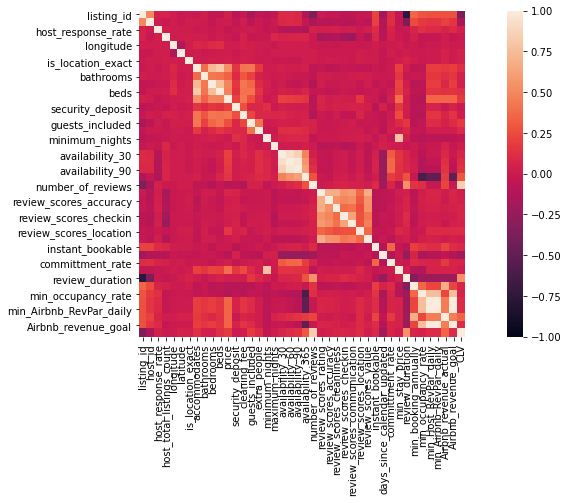

In [119]:
# Heatmap Analysis

fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True);

In [120]:
# Saving files into PowerBi folder. We can add the data whenever we want into that folder and have the dashboard upgraded.

df.to_csv(r'C:\Users\milad\Desktop\Import\Listings-2021.csv', index=None)
calendar.to_csv(r'C:\Users\milad\Desktop\Import\Calendar-2021.csv', index=None)

# Conclusion and my answers to the two questions:

*In conclusion*, particularly based on performance KPIs such as ADR, Airbnb Gross Revenue, RevPar, and CLV, we observe that Superhost product add more value to Airbnb than non Superhost. However, when it comes to the number of users, in Amsterdam, there are far more listings associated with non Superhosts which highlights the essence of concentrating and converting non Superhosts into a a Superhost or giving them incentives/promotions to increase their commitment to Airbnb, which means higher profit for Airbnb.

*Q1:* Yes, there are. Apart from 4 criteria that Airbnb has specified, Superhosts have a higher rank of commitment (see 3.1), more annually available days, greater rate of 'verified identification' and 'instant bookable', answering sooner, and more positive financial and performance analysis are also closely linked to that group.

*Q2:* That is not the best way probably to measure a Superhost and we can add/remove some other factors to that such as availability and commitment. But, when it comes to performance KPIs, they are contributing more than non Superhosts and have been distinguished correctly from the crowd, though always there is room to make the criteria improved.